In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D

In [2]:
(trainx,trainy),(testx,testy)=cifar10.load_data()

In [3]:
trainy=to_categorical(trainy)
testy=to_categorical(testy)

In [4]:
print("train data shape",testx.shape,testy.shape )

train data shape (10000, 32, 32, 3) (10000, 10)


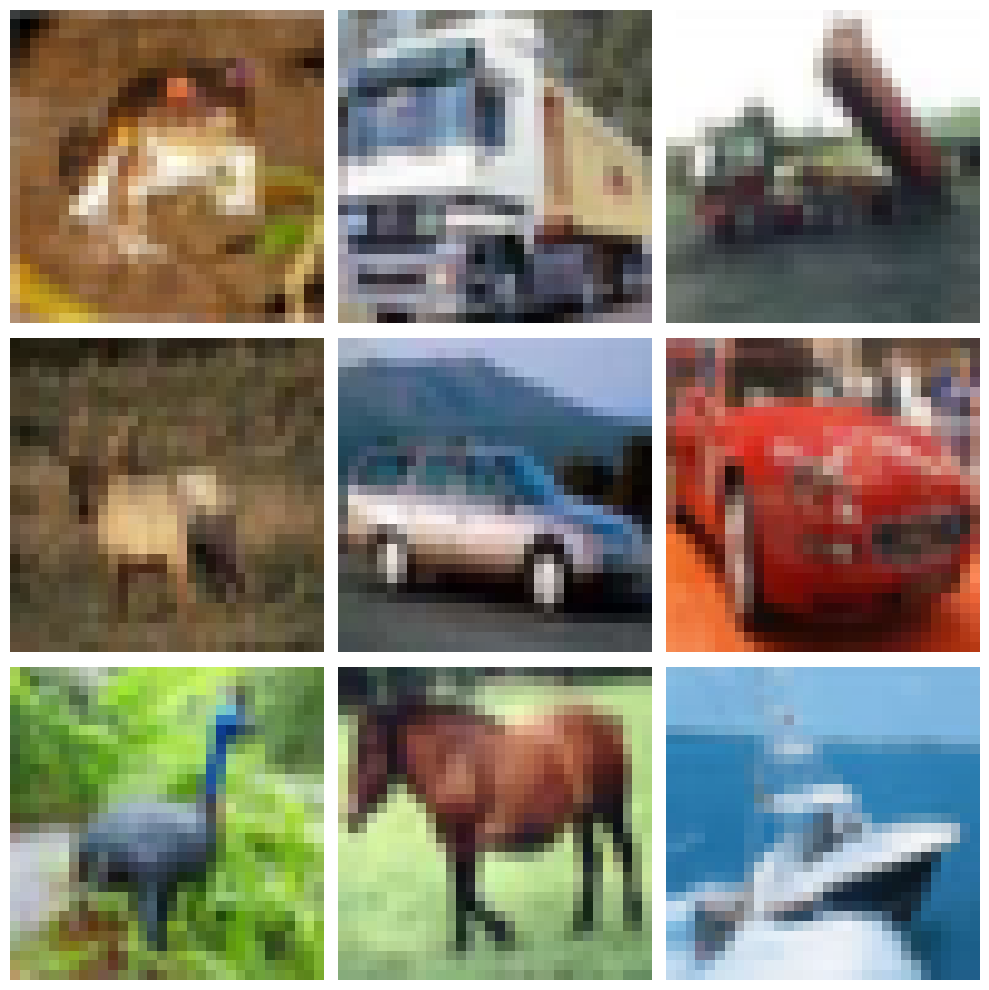

In [8]:
fig,axs=plt.subplots(3,3,figsize=(10,10))
for i in range(9):
  r=i//3
  c=i%3
  ax=axs[r,c]
  ax.imshow(trainx[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [21]:
trainx_norm = trainx.astype('float32')
testx_norm = testx.astype('float32')
# normalize to range 0-1
trainx_norm = trainx_norm / 255.0
testx_norm = testx_norm / 255.0


In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [11]:
opt=SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(trainx_norm,trainy,epochs=10,batch_size=64,validation_data=(testx_norm,testy))

Epoch 1/10
782/782 [==============================] - 406s 517ms/step - loss: 1.5831 - accuracy: 0.4244 - val_loss: 1.2736 - val_accuracy: 0.5355
Epoch 2/10
782/782 [==============================] - 381s 487ms/step - loss: 1.1162 - accuracy: 0.6035 - val_loss: 1.0190 - val_accuracy: 0.6358
Epoch 3/10
782/782 [==============================] - 382s 489ms/step - loss: 0.8807 - accuracy: 0.6912 - val_loss: 0.9202 - val_accuracy: 0.6828
Epoch 4/10
782/782 [==============================] - 387s 495ms/step - loss: 0.7310 - accuracy: 0.7438 - val_loss: 0.7769 - val_accuracy: 0.7267
Epoch 5/10
782/782 [==============================] - 389s 496ms/step - loss: 0.6229 - accuracy: 0.7827 - val_loss: 0.8274 - val_accuracy: 0.7210
Epoch 6/10
782/782 [==============================] - 384s 491ms/step - loss: 0.5331 - accuracy: 0.8143 - val_loss: 0.8068 - val_accuracy: 0.7292
Epoch 7/10
782/782 [==============================] - 384s 491ms/step - loss: 0.4527 - accuracy: 0.8405 - val_loss: 0.8002 -

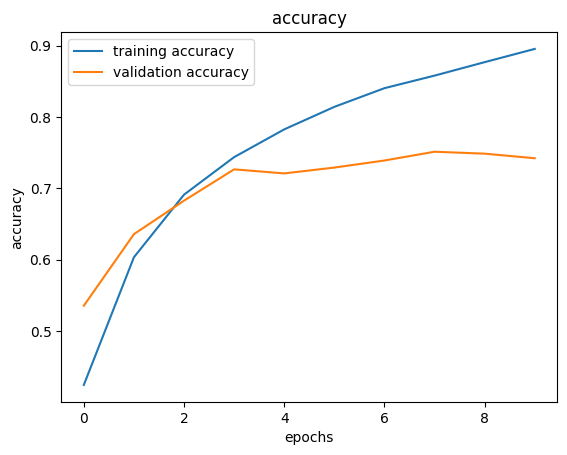

In [17]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()

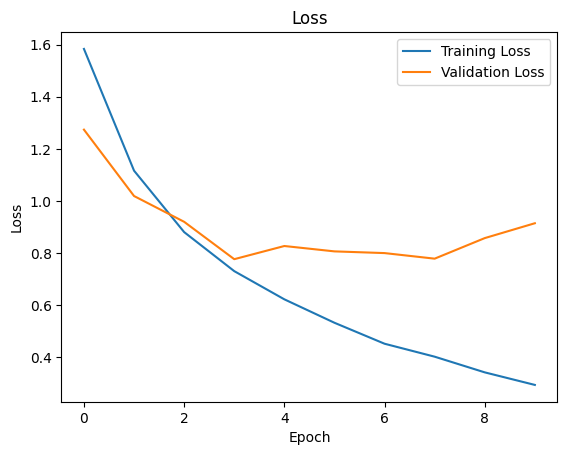

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(trainx_norm,trainy,epochs=1,batch_size=16,validation_split=0.1)

2813/2813 [==============================] - 392s 139ms/step - loss: 1.3933 - accuracy: 0.4931 - val_loss: 1.0590 - val_accuracy: 0.6256


In [36]:
h=model.evaluate(testx_norm,testy)

313/313 [==============================] - 25s 81ms/step - loss: 1.0095 - accuracy: 0.7461


In [40]:
print('accuracy',h[1],'\n','loss',h[0])

accuracy 0.7461000084877014 
 loss 1.0094587802886963


In [32]:
history=model.fit(trainx_norm,trainy,epochs=3,batch_size=64,validation_split=0.1)

Epoch 1/3
704/704 [==============================] - 359s 509ms/step - loss: 0.3631 - accuracy: 0.8724 - val_loss: 0.7881 - val_accuracy: 0.7618
Epoch 2/3
704/704 [==============================] - 344s 488ms/step - loss: 0.2822 - accuracy: 0.9006 - val_loss: 0.8152 - val_accuracy: 0.7610
Epoch 3/3
704/704 [==============================] - 349s 496ms/step - loss: 0.2163 - accuracy: 0.9227 - val_loss: 0.9748 - val_accuracy: 0.7454


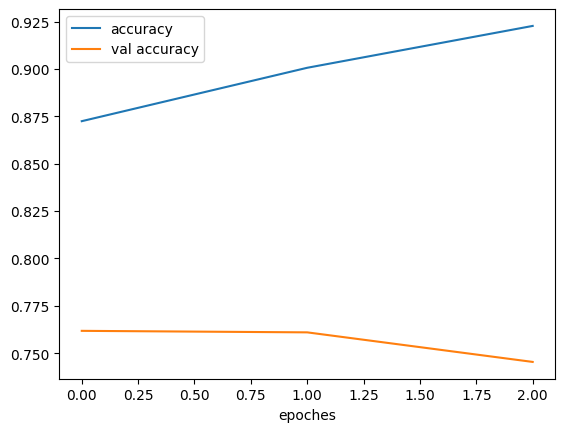

In [35]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.xlabel('epoches')
plt.legend()